# SNCF - La fréquentation des gares a-t-elle une influence sur le nombre d'objet perdu?

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Première analyse : variation de la fréquentation du réseau sur le temps

In [2]:
dataFreq = pd.read_csv('./data/frequentation-gares.csv', delimiter=';')

In [3]:
usersOverYears = dict()
usersOverYears['2015'] = dataFreq['Total Voyageurs 2015'].sum()
usersOverYears['2016'] = dataFreq['Total Voyageurs 2016'].sum()
usersOverYears['2017'] = dataFreq['Total Voyageurs 2017'].sum()
usersOverYears['2018'] = dataFreq['Total Voyageurs 2018'].sum()
usersOverYears['2019'] = dataFreq['Total Voyageurs 2019'].sum()
usersOverYears['2020'] = dataFreq['Total Voyageurs 2020'].sum()
usersOverYearsDf = pd.DataFrame.from_dict(usersOverYears, orient='index')
# rename columns
usersOverYearsDf.index.names = ['Année']
usersOverYearsDf = usersOverYearsDf.rename(columns = {0:'Nombre'})
usersOverYearsDf['Type'] = "Utilisateurs"

In [4]:
allUsersOverYears = dict()
allUsersOverYears['2015'] = dataFreq['Total Voyageurs + Non voyageurs 2015'].sum()
allUsersOverYears['2016'] = dataFreq['Total Voyageurs + Non voyageurs 2016'].sum()
allUsersOverYears['2017'] = dataFreq['Total Voyageurs + Non voyageurs 2017'].sum()
allUsersOverYears['2018'] = dataFreq['Total Voyageurs + Non voyageurs 2018'].sum()
allUsersOverYears['2019'] = dataFreq['Total Voyageurs + Non voyageurs 2019'].sum()
allUsersOverYears['2020'] = dataFreq['Total Voyageurs + Non voyageurs 2020'].sum()
allUsersOverYearsDf = pd.DataFrame.from_dict(allUsersOverYears, orient='index')
# rename columns
allUsersOverYearsDf.index.names = ['Année']
allUsersOverYearsDf = allUsersOverYearsDf.rename(columns = {0:'Nombre'})
allUsersOverYearsDf['Type'] = "Tout utilisateurs"

In [5]:
visitorsOverYears = dict()
visitorsOverYears['2015'] = allUsersOverYears['2015'] - usersOverYears['2015']
visitorsOverYears['2016'] = allUsersOverYears['2016'] - usersOverYears['2016']
visitorsOverYears['2017'] = allUsersOverYears['2017'] - usersOverYears['2017']
visitorsOverYears['2018'] = allUsersOverYears['2018'] - usersOverYears['2018']
visitorsOverYears['2019'] = allUsersOverYears['2019'] - usersOverYears['2019']
visitorsOverYears['2020'] = allUsersOverYears['2020'] - usersOverYears['2020']
visitorsOverYearsDf = pd.DataFrame.from_dict(visitorsOverYears, orient='index')
# rename columns
visitorsOverYearsDf.index.names = ['Année']
visitorsOverYearsDf = visitorsOverYearsDf.rename(columns = {0:'Nombre'})
visitorsOverYearsDf['Type'] = "Visiteurs"

<AxesSubplot: xlabel='Année', ylabel='Nombre'>

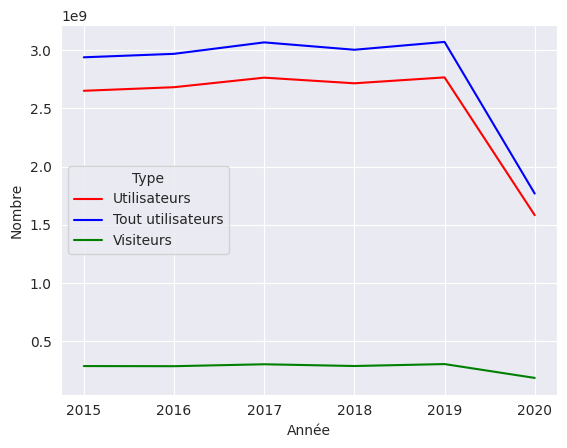

In [6]:
sb.lineplot(data=usersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['r'])
sb.lineplot(data=allUsersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['b'])
sb.lineplot(data=visitorsOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['g'])

On peut voir que les trois courbes suivent la même tendance :
   - une augmentation régulière de la fréquentation de 2015 à 2019
   - une chute de la fréquentation en 2020

In [7]:
print("Perte d'utilisateur en 2020 : ", ((1-usersOverYears['2020']/usersOverYears['2019'])*100).round(2), '%')
print("Perte de visiteurs en 2020 : ", ((1-visitorsOverYears['2020']/visitorsOverYears['2019'])*100).round(2), '%')

Perte d'utilisateur en 2020 :  42.78 %
Perte de visiteurs en 2020 :  39.03 %


#### Conclusion:
On peut conclure que en 2020 il y a un évènement qui a considérablement réduit la fréquentation du réseau. Cet évènement est sans aucun doute le confinement dû aux restrictions sanitaires liées à la pandémie du Covid-19

Donc pour la suite des analyses, nous allons exclure l'année 2020

## Deuxième analyse : fréquentation des gares

In [8]:
moyUsers = []
for index, row in dataFreq.iterrows():
    moyUsers.append((row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015'])/4)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Voyageurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Voyageurs", value=moyUsers, allow_duplicates=True)
moyVisitors = []
for index, row in dataFreq.iterrows():
    sumUsers = row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015']
    sumAllUsers = row['Total Voyageurs + Non voyageurs 2019']+row['Total Voyageurs + Non voyageurs 2018']+row['Total Voyageurs + Non voyageurs 2017']+row['Total Voyageurs + Non voyageurs 2016']+row['Total Voyageurs + Non voyageurs 2015']
    moyVisitors.append((sumAllUsers-sumUsers)/4)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Visiteurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Visiteurs", value=moyVisitors, allow_duplicates=True)
moyAllusers = []
for index, row in dataFreq.iterrows():
    moyAllusers.append((row['Total Voyageurs + Non voyageurs 2019']+row['Total Voyageurs + Non voyageurs 2018']+row['Total Voyageurs + Non voyageurs 2017']+row['Total Voyageurs + Non voyageurs 2016']+row['Total Voyageurs + Non voyageurs 2015'])/4)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Tout Utilisateurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Tout Utilisateurs", value=moyAllusers, allow_duplicates=True)

AxesSubplot(0.125,0.11;0.775x0.77)
Nombre de gares :  2967


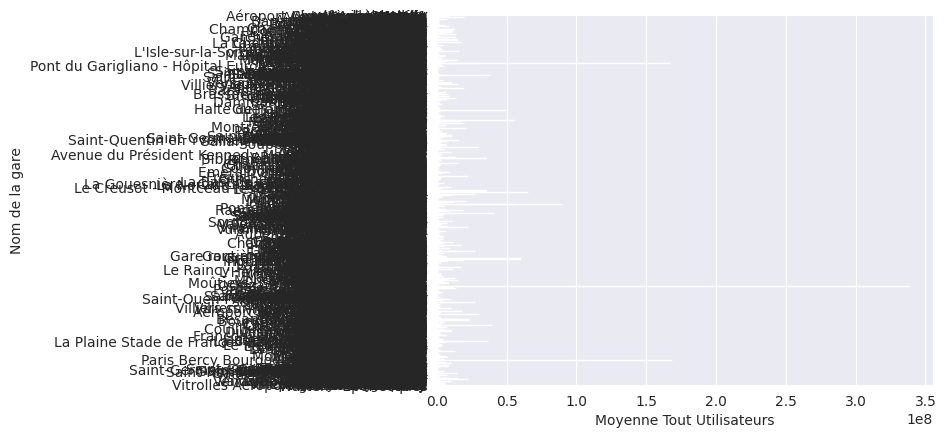

In [9]:
print(sb.barplot(dataFreq, x="Moyenne Tout Utilisateurs", y="Nom de la gare"))
print("Nombre de gares : ", len(dataFreq))

Les données de ce graphique sont illisibles, nous allons donc affiner et ne prendre que les valeurs et plus hautes d'un coté et les plus basses de l'autre ainsi que les gares de la médiane

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

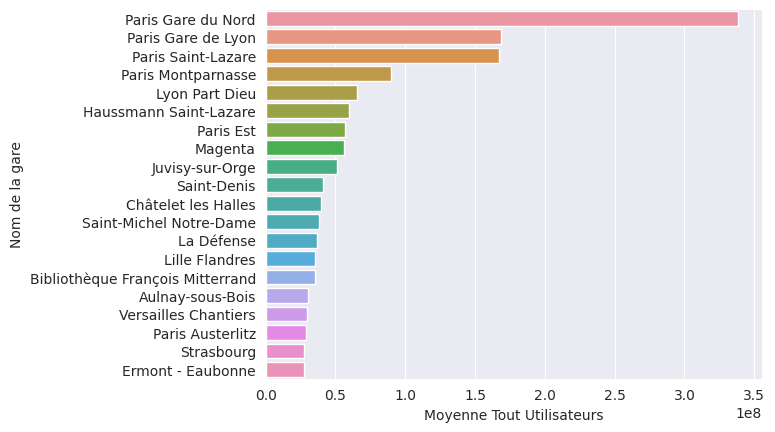

In [10]:
sb.barplot(data=dataFreq.nlargest(20, "Moyenne Tout Utilisateurs") , x="Moyenne Tout Utilisateurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

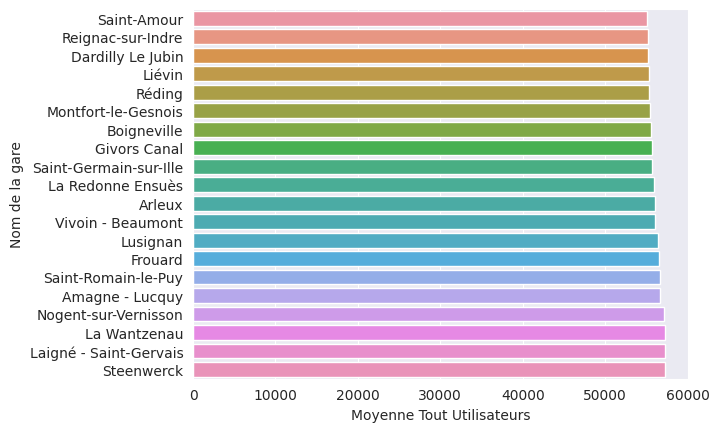

In [11]:
sb.barplot(data=dataFreq.sort_values('Moyenne Tout Utilisateurs')[int(len(dataFreq)/2-10):int(len(dataFreq)/2+10)] , x="Moyenne Tout Utilisateurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

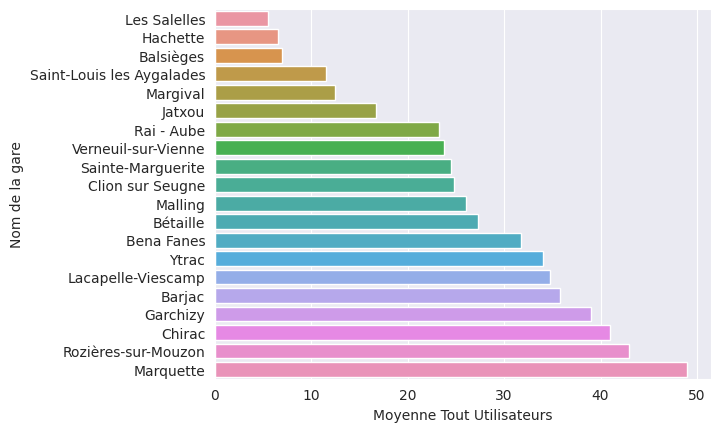

In [12]:
sb.barplot(data=dataFreq[dataFreq['Moyenne Tout Utilisateurs'] > 0].nsmallest(20, "Moyenne Tout Utilisateurs"), x="Moyenne Tout Utilisateurs", y="Nom de la gare")
# remove closed station with 0 user

Nous avons ici les 20 gares les moins utilisées, les plus utilisées et la médiane des deux

## Troisème analyse : Fréquentation par segment DRG

Définition du "segment DRG" :
- Catégorie A : gares de voyageurs d’intérêt national
- Catégorie B : gares de voyageurs d’intérêt régional
- Catégorie C : gares de voyageurs d’intérêt local

In [13]:
GSA = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'A'])
GSB = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'B'])
GSC = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'C'])
stationCount = len(dataFreq)
pourcentageSegmentData = [str(round(GSA/stationCount*100, 2))+" %", str(round(GSB/stationCount*100, 2))+" %", str(round(GSC/stationCount*100, 2))+" %"]
segmentDf = pd.DataFrame(data={"Segment": ["A", "B", "C"], "Nombre de gare": [GSA, GSB, GSC], "Pourcentage": pourcentageSegmentData})

<AxesSubplot: xlabel='Segment', ylabel='Nombre de gare'>

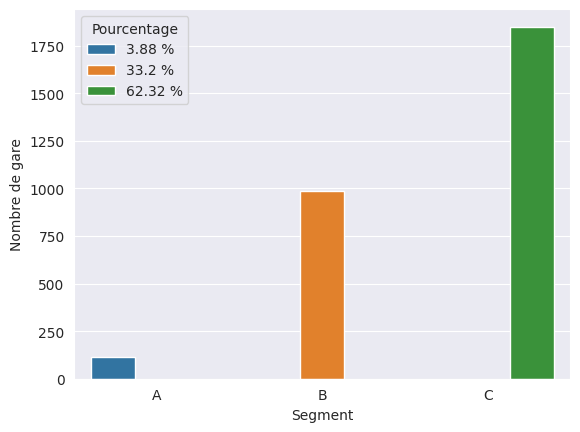

In [14]:
sb.barplot(data=segmentDf, x="Segment", y="Nombre de gare", hue="Pourcentage")

In [15]:
moyA = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'A')].mean()['Moyenne Tout Utilisateurs'])
moyB = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'B')].mean()['Moyenne Tout Utilisateurs'])
moyC = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'C')].mean()['Moyenne Tout Utilisateurs'])
sumFreq = sum(dataFreq['Moyenne Tout Utilisateurs'])

print("Moyenne fréquentation segment A :", moyA, "soit environ", round((moyA*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'A')])/sumFreq)*100, 2), '%')
print("Moyenne fréquentation segment B :", moyB, "soit environ", round((moyB*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'B')])/sumFreq)*100, 2), '%')
print("Moyenne fréquentation segment C :", moyC, "soit environ", round((moyC*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'C')])/sumFreq)*100, 2), '%')

Moyenne fréquentation segment A : 13034083 soit environ 39.84 %
Moyenne fréquentation segment B : 2189641 soit environ 57.32 %
Moyenne fréquentation segment C : 31983 soit environ 1.57 %


On a la confirmation que nos données sont conformes

### Quatrième analyse : les objets trouvés

In [16]:
dataLostAndFound = pd.read_csv('./data/objets-trouves.csv', delimiter=';')
dataLostAndFound.head()

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2018-01-05T07:54:17+01:00,2018-01-08T15:52:30+01:00,Dijon,87713040.0,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Objet trouvé
1,2018-01-05T08:19:10+01:00,NaN,Châtellerault,87575142.0,"Parapluie télescopique, parapluie de poche",Parapluies,Objet trouvé
2,2018-01-05T08:21:06+01:00,NaN,Creil,87276006.0,"Attaché-case, serviette","Bagagerie: sacs, valises, cartables",Objet trouvé
3,2018-01-05T08:24:25+01:00,2018-01-09T09:41:26+01:00,Nantes,87481002.0,Lunettes en étui,Optique,Objet trouvé
4,2018-01-05T08:43:24+01:00,NaN,Châtellerault,87575142.0,"Parapluie-canne, parapluie à bandoulière",Parapluies,Objet trouvé


In [17]:
dataLoss = pd.read_csv('./data/declarations-pertes.csv', delimiter=';')
dataLoss.head()

,Date,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2020-09-03T08:10:52+02:00,NaN,NaN,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Déclaration de Perte
1,2020-09-03T11:29:34+02:00,Bordeaux Saint-Jean,87581009.0,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
2,2019-12-02T08:28:48+01:00,NaN,NaN,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
3,2020-03-09T09:46:26+01:00,NaN,NaN,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Déclaration de Perte
4,2020-08-21T16:50:35+02:00,NaN,NaN,Sac à dos,"Bagagerie: sacs, valises, cartables",Déclaration de Perte


In [18]:
dictLostAndFoundByStation = {}
for index, row in dataLostAndFound.iterrows():
    if row['Gare'] in dictLostAndFoundByStation:
        dictLostAndFoundByStation[row['Gare']] += 1
    else:
         dictLostAndFoundByStation[row['Gare']] = 1

dataLostAndFoundByStation = pd.DataFrame.from_dict(dictLostAndFoundByStation, orient='index')
# rename columns
dataLostAndFoundByStation.index.names = ['Nom de la gare']
dataLostAndFoundByStation = dataLostAndFoundByStation.rename(columns = {0:'Objets Trouvés'})

In [19]:
dictLossByStation = {}
for index, row in dataLoss.iterrows():
    if row['Gare'] in dictLossByStation:
        dictLossByStation[row['Gare']] += 1
    else:
         dictLossByStation[row['Gare']] = 1

dataLossByStation = pd.DataFrame.from_dict(dictLossByStation, orient='index')
# rename columns
dataLossByStation.index.names = ['Nom de la gare']
dataLossByStation = dataLossByStation.rename(columns = {0:'Pertes Déclarées'})

In [20]:
data = pd.merge(dataFreq, dataLostAndFoundByStation, how='left', on='Nom de la gare')
data = pd.merge(data, dataLossByStation, how='left', on='Nom de la gare')
data = data.fillna(0)

Regardons quel est le pourcentage de gare où il n'y a eu aucun recensement

In [21]:
print(round((len(data[(data['Objets Trouvés'] == 0) & (data['Pertes Déclarées'] == 0)])/len(data))*100, 2), '%')

94.14 %


In [22]:
sumObjects = []
for index, row in data.iterrows():
    sumObjects.append(row['Objets Trouvés']+row['Pertes Déclarées'])

# condition to avoid duplicate if the cell is reloaded
if not "Objets trouvés et déclarés perdus" in data:
    data.insert(loc=data.shape[1], column="Objets trouvés et déclarés perdus", value=sumObjects, allow_duplicates=True)

data = data[data['Objets trouvés et déclarés perdus'] > 0]
print("Nombre de gare exploitable :", len(data))

Nombre de gare exploitable : 174


[Text(0.5, 0, 'Objets trouvés & déclarés perdus')]

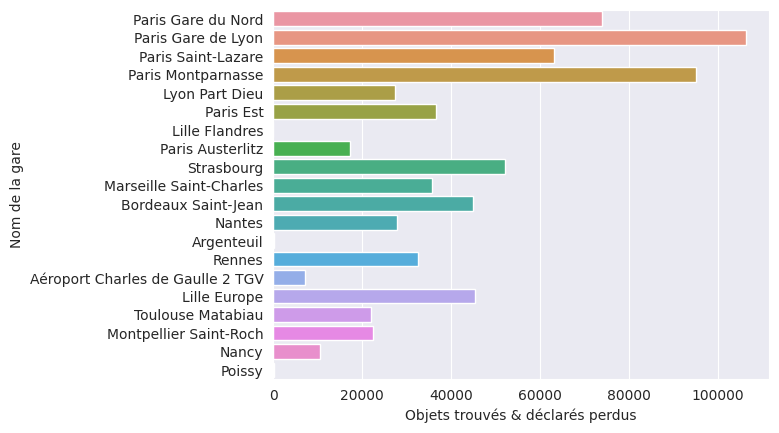

In [29]:
sb.barplot(data=data.nlargest(20, "Moyenne Tout Utilisateurs"), x="Objets trouvés et déclarés perdus", y="Nom de la gare").set(xlabel="Objets trouvés & déclarés perdus")

[Text(0.5, 0, 'Objets trouvés & déclarés perdus')]

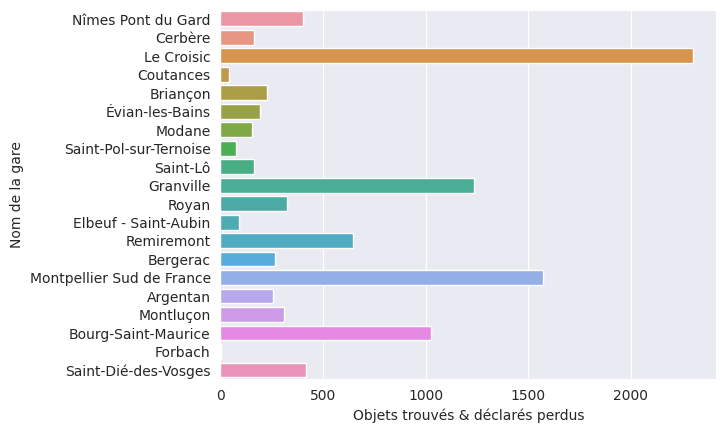

In [30]:
sb.barplot(data=data.nsmallest(20, "Moyenne Tout Utilisateurs"), x="Objets trouvés et déclarés perdus", y="Nom de la gare").set(xlabel="Objets trouvés & déclarés perdus")

[Text(0, 0.5, 'Objets trouvés & déclarés perdus')]

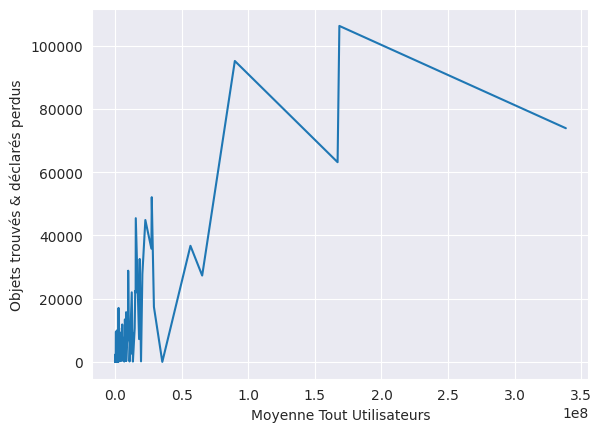

In [31]:
sb.lineplot(data=data, x="Moyenne Tout Utilisateurs", y="Objets trouvés et déclarés perdus").set(ylabel="Objets trouvés & déclarés perdus")

Ici les gares beaucoup de fréquentations nous empêche de visualiser correctement la courbe
Nous allons ne prendre que qu'une partie des données. Pour cela nous allons filtrer les données en utilisant le quantile 75 car il permet de retirer le segment A et les plus grosses gares du segment B. (cf histogramme nombre de gare/segment)

In [26]:
print("Q75['Moyenne Tout Utilisateurs'] =", data['Moyenne Tout Utilisateurs'].quantile(0.75))

Q75['Moyenne Tout Utilisateurs'] = 5852985.625


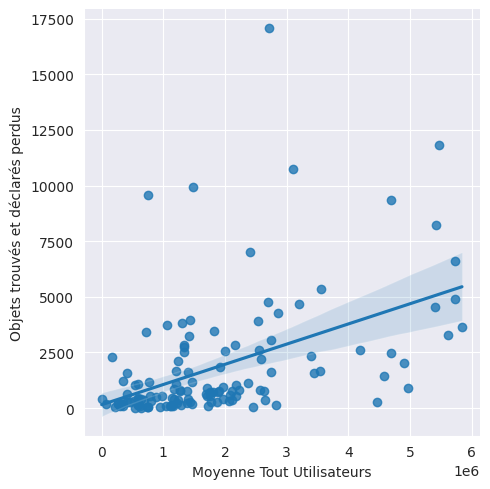

In [32]:
sb.lmplot(data=data[data['Moyenne Tout Utilisateurs'] < data['Moyenne Tout Utilisateurs'].quantile(0.75)], x="Moyenne Tout Utilisateurs", y="Objets trouvés et déclarés perdus")